In [22]:
import numpy as np
from random import gauss
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_predict
import statsmodels.api as sm
import pmdarima.arima as arima


In [3]:
n = 500

In [4]:
y = np.random.normal(0, 1, n)
x = np.zeros(n)
x[0] = y[0] / 2
for i in range(1, n):
    x[i] = y[i] / 2 + y[i - 1] / 4
y.mean(), y.var()

(-0.02005679947570317, 1.07029670861208)

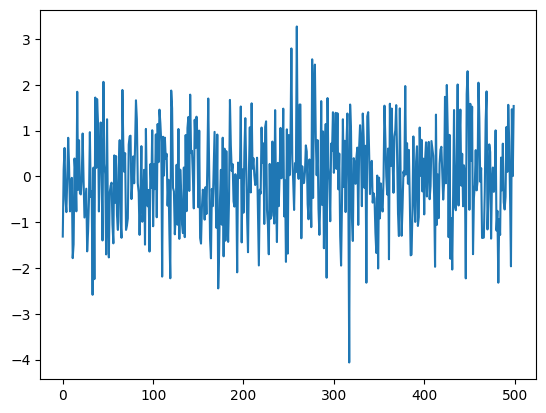

In [5]:
plt.plot(range(n), y)

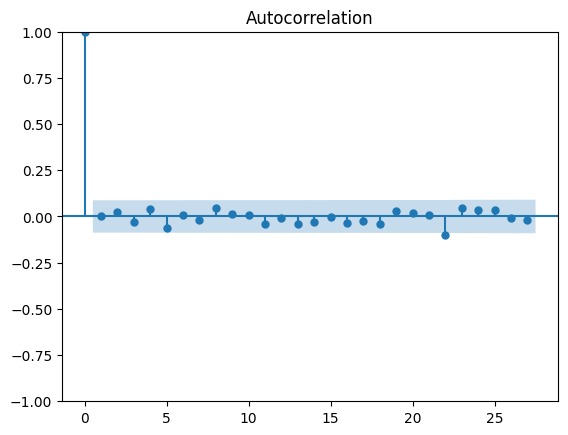

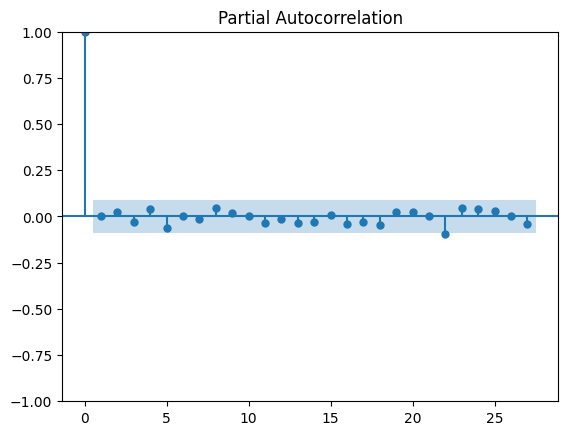

In [6]:
plot_acf(y)
plot_pacf(y)
None

In [10]:
n = 2500
p = 1
eps = np.random.normal(0, 60, n)
x = np.zeros(n)
a = [1, 1]
for k in range(1, n):
    x[k] += eps[k]
    for i in range(1, min(k + 1, p + 1)):
        x[k] += a[i] * x[k - i] + 10 * np.sin(k / 10) + 20 * np.sin(k / 50)

x.mean(), x.var()

(3672.465777666155, 3477817.476162854)

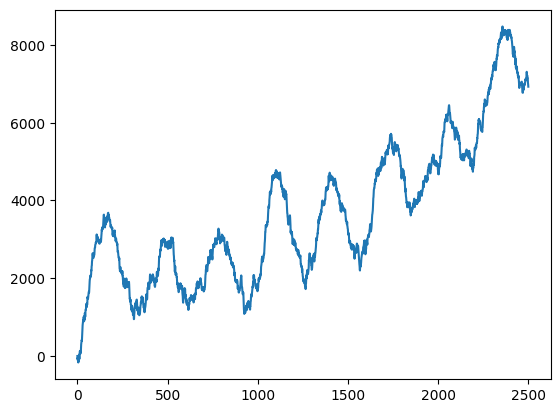

In [11]:
plt.plot(range(n), x)

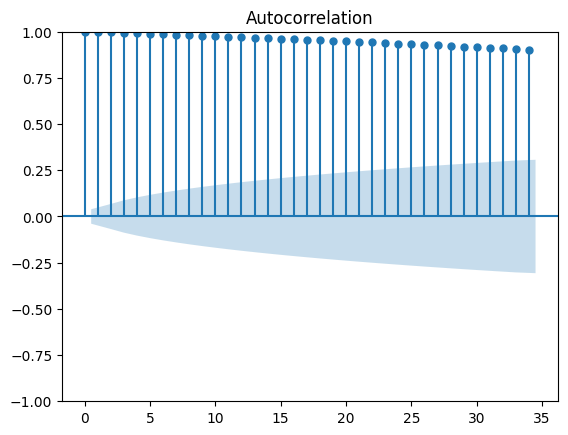

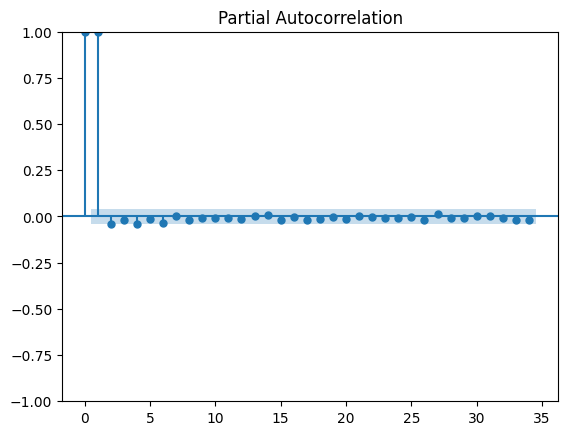

In [12]:
plot_acf(x)
plot_pacf(x)
None

In [13]:
n = 2500
eps = np.random.normal(0, 10, n)
x = np.array([i for i in eps])
x[1:] += 1 * eps[:-1]
x[2:] += 0.5 * eps[:-2]
z = np.array([i for i in eps])
for i in range(1, n):
    z[i] +=  1000 * np.sin(i / 50) / (i**(1/3))
z[0] += 1000 * np.sin(0)

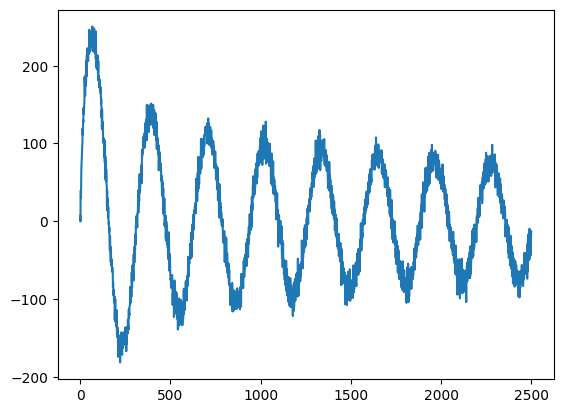

In [109]:
plt.plot(range(n), z)

In [30]:
n = 2500
eps = np.random.normal(0, 1, n)
p = 2
q = 1
x = np.zeros(n)
a = [-1, -0.01, 0.5]
b = [-1, 0.8]
for k in range(1, n):
    x[k] += eps[k]
    for i in range(1, min(k + 1, p + 1)):
        x[k] += a[i] * x[k - i]
    for j in range(1, q + 1):
        x[k] += b[j] * eps[k - j]

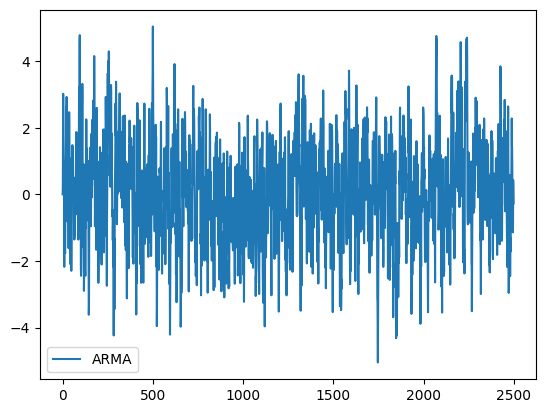

In [31]:
#fig = plt.plot(range(n), z, label='f')
fig = plt.plot(range(n), x, label='ARMA')
plt.legend()

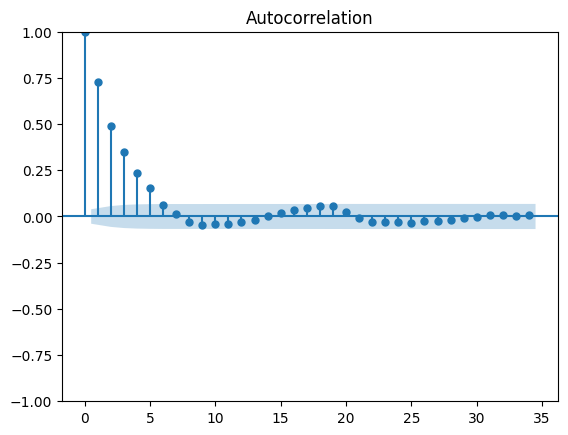

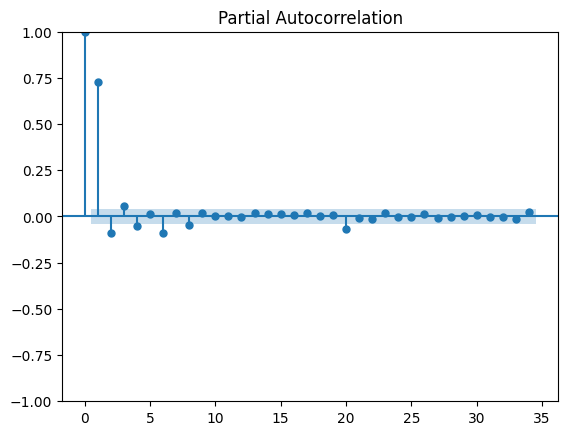

In [32]:
plot_acf(x)
plot_pacf(x)
None

In [33]:
r = np.roots(a[-1::-1])
print('Корни хар. ур. AR:', r)
if any([abs(r[i]) <= 1 for i in range(len(r))]):
    print('Нестационарный')
else:
    print('Стационарный')

Корни хар. ур. AR: [ 1.42424892 -1.40424892]
Стационарный


In [34]:
r = np.roots(b[-1::-1])
print('Корни хар. ур. MA:', r)
if any([abs(r[i]) <= 1 for i in range(len(r))]):
    print('Необратимый')
else:
    print('Обратимый')

Корни хар. ур. MA: [1.25]
Обратимый


In [35]:
a_ = np.sum(x[1:] * x[:-1]) / np.sum(x[:-1]**2)
a_

0.7302599036615457

In [37]:
start = (len(x) * 7) // 10
train = np.array([i for i in x[:start]])
print(len(train))
model = arima.auto_arima(x, start_P=2, start_q=1, d = 0, seasonal=False, m=12, trace=True, suppress_warnings=True, error_action='ignore', stepwise=True,)
model_ = sm.tsa.statespace.SARIMAX(x, order=(2, 0, 1))
results = model_.fit()
print(results.summary().tables[1])
'''
a = [-1, -0.01, 0.5]
b = [-1, 0.8]
'''

1750
Performing stepwise search to minimize aic


c:\Users\max11\AppData\Local\Programs\Python\Python310\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(2,0,1)(0,0,0)[0]             : AIC=7083.119, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=9032.429, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=7130.168, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=7616.647, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=7108.100, Time=0.13 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=7111.948, Time=0.11 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=7084.653, Time=0.45 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=7084.657, Time=0.51 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=7101.573, Time=0.21 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=7105.571, Time=0.14 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=7084.111, Time=1.18 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=7084.623, Time=0.53 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0]          
Total fit time: 3.745 seconds
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------

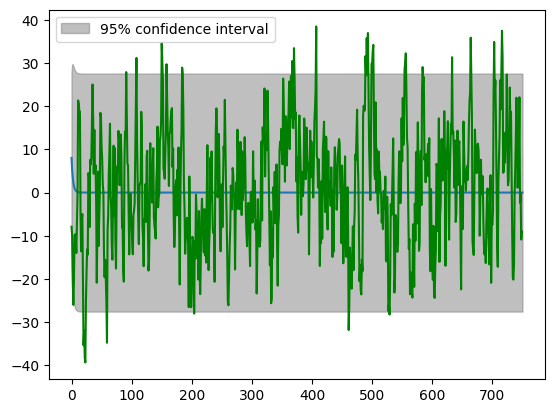

In [29]:
plot_predict(results, start=start, end=2500, dynamic=True)
plt.plot(x[start:], 'g')
None